In [21]:
# prompt: importa la base de datos customer churn de mi drive con el nombre completo /content/sample_data/Customer-Churn-Records (1).csv

import pandas as pd
df = pd.read_csv('/content/sample_data/Customer-Churn-Records (1).csv')
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58

In [22]:
print(df.describe())

print(df.info())

print(df.isnull().sum())

print(df['Exited'].value_counts())

print(df.groupby('Geography')['Exited'].mean())


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

#Responde las siguientes preguntas relacionadas con los conceptos de an´alisis de datos, estad´ısticas y
Machine Learning.

**¿Qu´e pasos seguir´ıas para realizar un an´alisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizar´ıas.**

Para realizar un análisis exploratorio de datos (EDA) antes de construir un modelo de Machine Learning, seguiría estos pasos, utilizando Python con librerías como Pandas, NumPy, Matplotlib y Seaborn:

1. **Carga y revisión inicial de los datos:**  Primero, cargaría el conjunto de datos usando Pandas (como ya se ha hecho con `pd.read_csv()`). Luego, usaría `df.head()`, `df.tail()` y `df.sample()` para visualizar las primeras filas, las últimas y una muestra aleatoria, respectivamente.  Esto me da una primera impresión de la estructura de los datos, los tipos de variables y algunos valores representativos. `df.info()` proporciona información sobre el tipo de dato de cada columna y la presencia de valores nulos, mientras que `df.describe()` ofrece estadísticas descriptivas (media, desviación estándar, cuartiles, etc.) para las columnas numéricas.

2. **Manejo de valores faltantes:** Usando `df.isnull().sum()` (como ya se ha hecho) identificaría la cantidad de valores nulos por columna.  Dependiendo del porcentaje de valores faltantes y la importancia de la variable, podría optar por eliminar las filas con valores nulos (`df.dropna()`), imputar los valores faltantes con la media, mediana o moda (`df.fillna()`), o usar métodos más sofisticados como la imputación KNN.

3. **Análisis univariado:** Examinaría cada variable individualmente. Para variables numéricas, usaría histogramas (`plt.hist()`) y diagramas de caja (`sns.boxplot()`) para observar su distribución, identificar valores atípicos (outliers) y detectar posibles sesgos. Para variables categóricas, usaría tablas de frecuencia (`df['variable'].value_counts()`) y gráficos de barras (`sns.countplot()`) para observar la distribución de las categorías.

4. **Análisis bivariado:**  Investigaría las relaciones entre pares de variables. Para variables numéricas, usaría diagramas de dispersión (`plt.scatter()`) y calcularía la correlación entre ellas (`df.corr()`).  Para variables categóricas, usaría tablas de contingencia y gráficos de barras agrupadas.  La combinación de una variable numérica con una categórica se puede visualizar usando boxplots o violinplots para cada categoría.

5. **Análisis multivariado:**  Para entender las interacciones entre múltiples variables, utilizaré técnicas como la reducción de dimensionalidad (PCA) y la visualización en múltiples dimensiones (si es posible).  También exploraría combinaciones de variables para ver si puedo crear nuevas variables que sean más predictivas.  El análisis de componentes principales (PCA) me permite visualizar datos en menos dimensiones.

6. **Detección de valores atípicos (outliers):** En los pasos anteriores, se han detectado outliers.  Debo decidir si los elimino, los transformo (usando logaritmos, por ejemplo) o si los conservo, dependiendo de su causa y si son importantes para el problema que quiero resolver.

7. **Análisis de la variable objetivo:** Si el objetivo es predecir un evento o una variable específica (como la variable `Exited` en este caso), prestaría especial atención a su distribución y su relación con el resto de variables. Usando `df['Exited'].value_counts()` y `df.groupby('Geography')['Exited'].mean()`, como ya se hizo, obtenemos información clave de la variable objetivo.  También haría gráficos para visualizar la relación con otras variables.

**Herramientas:**

* **Pandas:** Manipulación y análisis de datos.
* **NumPy:** Operaciones numéricas.
* **Matplotlib & Seaborn:** Visualización de datos.
* **Scikit-learn:**  Para PCA u otras técnicas de preprocesamiento si fuera necesario.


**Imagina que uno de los datos contiene valores faltantes o at´ıpicos (outliers). ¿Qu´e t´ecnicas utilizar´ıas
para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.**

Para tratar valores faltantes y atípicos (outliers) en el conjunto de datos, emplearía las siguientes técnicas, justificando cada una:

**Valores Faltantes:**

1. **Imputación con la media, mediana o moda:** Si el porcentaje de valores faltantes es bajo y la variable es numérica, podría sustituir los valores faltantes por la media o la mediana. Si la variable es categórica, usaría la moda.  Esta es una opción simple, pero puede distorsionar ligeramente la distribución de la variable si hay muchos valores faltantes.  La justificación es su simplicidad y rapidez, adecuada para datos con pocos valores faltantes.

2. **Imputación K-NN:** Para variables numéricas, si la cantidad de valores faltantes es moderada, usaría la imputación K-NN. Este método busca los k vecinos más cercanos (en términos de otras variables) a las instancias con datos faltantes y utiliza sus valores para estimar el dato faltante. Es más preciso que la imputación por la media o la mediana, ya que considera la similitud con otros registros.

3. **Imputación por modelo predictivo:**  Para un porcentaje alto de datos faltantes o cuando las variables tienen una fuerte relación, usaría un modelo predictivo (regresión lineal, árbol de decisión, etc.) para predecir los valores faltantes.  Entreno el modelo con las instancias donde hay datos completos y luego lo uso para predecir los valores perdidos.  Esto captura mejor la relación entre variables y brinda un resultado más preciso.

4. **Eliminación de filas o columnas:** En casos extremos, si una columna tiene un porcentaje muy alto de valores faltantes y no es crítica para el análisis, la eliminaría. Si las filas con datos faltantes representan una pequeña porción del conjunto de datos, las eliminaría.

**Valores Atípicos (Outliers):**

1. **Análisis de la causa raíz:** Primero intentaría entender por qué existen estos valores atípicos.  ¿Son errores de medición? ¿Representan casos reales inusuales o casos extremos? Si son errores, se deben corregir o eliminar.  Si son casos reales, depende de la naturaleza del problema y de su importancia.

2. **Transformación de variables:** Podría aplicar una transformación logarítmica o una transformación Box-Cox a la variable con valores atípicos. Esto puede reducir la influencia de los valores extremos.  Esta técnica ayuda a estabilizar la varianza y acercarse a una distribución normal.

3. **Eliminación de outliers:**  Si los outliers son pocos y se consideran errores de medición, podría eliminar las filas que los contienen.  Sin embargo, esta decisión debe tomarse con precaución, ya que la eliminación podría introducir sesgo si los valores atípicos son significativos. La justificación es solo en casos en los que su presencia es claramente problemática y no representativa.

4. **Winsorizing:** Este método consiste en sustituir los valores atípicos por un valor límite predefinido (por ejemplo, el percentil 95 o 5). Esto limita la influencia de los valores extremos, sin eliminarlos del conjunto de datos.

5. **Modelos robustos:** En algunos casos, los modelos de Machine Learning robustos a outliers (como los basados en árboles de decisión) son menos afectados por los valores extremos. Si es posible, se usarían estos modelos.

La técnica específica que utilizaré dependerá de la naturaleza de los datos, la cantidad de valores faltantes o atípicos y su impacto potencial en el análisis.  Es importante documentar las decisiones tomadas.


**En este caso, el objetivo es predecir si un cliente abandonar´a el banco (Exited) bas´andonos en sus
caracter´ısticas. ¿Qu´e tipo de modelo de clasificaci´on usar´ıas y por qu´e? Discute las ventajas y desventajas
de este modelo.**

Para predecir si un cliente abandonará el banco (variable "Exited"), que es una tarea de clasificación binaria, recomendaría usar un **modelo de *Random Forest***.

**Razones:**

* **Manejo de variables categóricas y numéricas:**  Random Forest puede manejar eficientemente variables de diferentes tipos sin necesidad de una extensa transformación previa.  El dataset probablemente contiene características tanto categóricas (como la geografía o el género) como numéricas (como la edad, el balance o el número de productos).
* **Robustez a outliers:** Los árboles de decisión, que son la base de Random Forest, son relativamente robustos a valores atípicos. No se ven tan afectados como modelos lineales por datos anómalos.
* **Importancia de variables:**  Random Forest permite determinar la importancia relativa de cada variable predictora, lo que ayuda a comprender qué factores influyen más en la probabilidad de abandono. Esto proporciona información valiosa para la toma de decisiones y la gestión de la retención de clientes.
* **Buen rendimiento general:**  En problemas de clasificación como este, Random Forest suele tener un buen rendimiento general, ofreciendo una buena precisión y evitando problemas de sobreajuste.  Su naturaleza de conjunto (ensamblaje de múltiples árboles) reduce la varianza del modelo.

**Ventajas:**

* **Alta precisión:** Generalmente proporciona una buena precisión predictiva.
* **Manejo de variables no lineales:** Puede capturar relaciones no lineales entre las variables.
* **Robustez:** No se ve tan afectado por outliers o datos ruidosos.
* **Importancia de variables:** Facilita la identificación de las variables más relevantes.
* **Escalabilidad:** Se puede aplicar eficientemente a grandes conjuntos de datos.

**Desventajas:**

* **Interpretabilidad:** Los modelos de Random Forest pueden ser menos interpretables que otros modelos como la regresión logística. Aunque se puede analizar la importancia de las variables, comprender la interacción compleja de muchos árboles puede ser difícil.
* **Complejidad computacional:**  Puede ser más lento de entrenar que otros modelos de clasificación más simples (como la regresión logística), especialmente con un gran número de árboles o variables.
* **Uso de memoria:**  Puede requerir una cantidad significativa de memoria, especialmente con un conjunto de datos grande y muchos árboles.


**¿Qu´e es el desbalanceo de clases y por qu´e es un problema al entrenar un modelo de clasificaci´on? ¿Qu´e
t´ecnicas utilizar´ıas para abordar este problema, como SMOTE?**

> Añadir blockquote



El desbalanceo de clases ocurre cuando en un conjunto de datos para clasificación, una clase (o categoría) tiene significativamente más ejemplos que otras.  Por ejemplo, en un conjunto de datos para detectar fraudes con tarjetas de crédito, la mayoría de las transacciones serán legítimas (clase mayoritaria) y solo unas pocas serán fraudulentas (clase minoritaria).

Este desbalanceo es un problema porque los modelos de clasificación tienden a sesgarse hacia la clase mayoritaria, ya que maximizar la precisión general puede lograrse simplemente clasificando todos los ejemplos como pertenecientes a la clase dominante.  Esto resulta en un modelo que predice bien la clase mayoritaria pero que falla en identificar correctamente la clase minoritaria, que en muchas aplicaciones (como la detección de fraudes, enfermedades raras o fallas mecánicas) es precisamente la clase de interés.  En otras palabras, un modelo con un alto porcentaje de precisión general puede ser inútil en la práctica si no identifica adecuadamente la clase minoritaria.

Para abordar este problema, existen varias técnicas:

* **Sobremuestreo (Oversampling):** Se aumentan los ejemplos de la clase minoritaria. SMOTE (Synthetic Minority Over-sampling Technique) es una técnica popular.  Crea nuevos ejemplos sintéticos de la clase minoritaria interpolando entre ejemplos existentes.  Esto ayuda a equilibrar las clases sin simplemente duplicar los datos.

* **Submuestreo (Undersampling):** Se reducen los ejemplos de la clase mayoritaria.  Técnicas como el submuestreo aleatorio eliminan aleatoriamente ejemplos de la clase mayoritaria.  Sin embargo, se corre el riesgo de perder información valiosa.

* **Cost-sensitive learning:** Se asignan diferentes pesos a las clases durante el entrenamiento.  El modelo penaliza más los errores en la clasificación de la clase minoritaria.

* **Ensembles:** Técnicas como los Random Forest y los Boosting, aunque no resuelven el desbalance en sí, suelen funcionar mejor con clases desbalanceadas que modelos simples debido a su capacidad de "votar" y combinar las predicciones de múltiples modelos.

* **Modificar la métrica de evaluación:** En lugar de la precisión general, se utilizan métricas más informativas como la precisión (precision), la exhaustividad (recall), la puntuación F1 o el AUC-ROC. Estas métricas toman en cuenta la performance en ambas clases y son especialmente sensibles al rendimiento en la clase minoritaria.


SMOTE es una técnica de sobremuestreo que crea nuevos ejemplos sintéticos de la clase minoritaria interpolando entre ejemplos existentes en el espacio de características.  Es preferible a la simple duplicación de datos, ya que introduce más diversidad en la clase minoritaria. La técnica se basa en encontrar los k vecinos más cercanos de un ejemplo de la clase minoritaria, y luego generar nuevos ejemplos entre este punto y sus vecinos.


**¿Qu´e es el overfitting y c´omo puedes detectarlo en un modelo de Machine Learning? Explica qu´e medidas
tomar´ıas para evitar el sobreajuste y mejorar la capacidad de generalizaci´on de tu modelo.**

El *overfitting* (sobreajuste) en Machine Learning ocurre cuando un modelo se ajusta demasiado bien a los datos de entrenamiento, aprendiendo incluso el ruido y las peculiaridades específicas de ese conjunto de datos.  Como resultado, el modelo funciona excepcionalmente bien en los datos de entrenamiento, pero su rendimiento disminuye significativamente cuando se enfrenta a nuevos datos (datos de prueba o datos reales nunca antes vistos).  En esencia, el modelo ha memorizado los datos de entrenamiento en lugar de aprender los patrones generales subyacentes.

**Detectar el *overfitting*:**

Existen varias maneras de detectar el *overfitting*:

* **Comparación de métricas de rendimiento:** La métrica de rendimiento (por ejemplo, precisión, AUC-ROC, F1-score) en el conjunto de entrenamiento es mucho más alta que la métrica de rendimiento en el conjunto de prueba o validación.  Una gran diferencia entre estas métricas indica un posible *overfitting*.
* **Curva de aprendizaje:** Una curva de aprendizaje que muestra una gran diferencia entre el error de entrenamiento y el error de validación, y donde el error de validación permanece alto incluso con un gran número de ejemplos de entrenamiento.
* **Análisis de residuos:**  En algunos casos, el análisis de los residuos del modelo puede revelar patrones que indican *overfitting*. Si el modelo falla en capturar la varianza en los residuos, puede ser indicativo de sobreajuste.
* **Validación cruzada:**  Realizar una validación cruzada (k-fold) puede ayudar a identificar si el modelo generaliza bien a diferentes subconjuntos de los datos.

**Medidas para evitar el *overfitting*:**

1. **Más datos:** Aumentar la cantidad de datos de entrenamiento es la mejor manera de evitar el *overfitting*.  Con más datos, el modelo tiene más ejemplos para aprender los patrones subyacentes, reduciendo la influencia del ruido.

2. **Simplificar el modelo:** Usar un modelo menos complejo puede reducir el riesgo de *overfitting*.  Por ejemplo, reducir el número de capas o neuronas en una red neuronal, o reducir la profundidad de un árbol de decisión.

3. **Regularización:**  Agregar términos de penalización a la función de pérdida del modelo para desalentar valores muy grandes de los coeficientes.  L1 (Lasso) y L2 (Ridge) son técnicas comunes de regularización.

4. **Dropout (redes neuronales):** Desactivar aleatoriamente neuronas durante el entrenamiento para prevenir la dependencia excesiva en ciertas neuronas y fomentar una representación más robusta.

5. **Aumento de datos:** Crear nuevos ejemplos de datos de entrenamiento a partir de los datos existentes mediante transformaciones como rotaciones, traslaciones, o pequeñas variaciones. Esto ayuda a aumentar la diversidad de los datos y reducir el *overfitting*.

6. **Validación cruzada (k-fold):** Esta técnica divide el conjunto de datos en k subconjuntos y entrena el modelo en k-1 subconjuntos, validando en el subconjunto restante.  El proceso se repite k veces.  Esto ayuda a estimar mejor el rendimiento del modelo en datos no vistos.

7. **Early stopping:** Monitorear el rendimiento del modelo en el conjunto de validación durante el entrenamiento y detener el entrenamiento cuando el rendimiento deja de mejorar, previniendo que el modelo siga aprendiendo el ruido de los datos de entrenamiento.

8. **Feature selection/engineering:** Eliminar o combinar variables irrelevantes, o crear nuevas características más relevantes, puede mejorar la capacidad de generalización del modelo.

**Mejorar la capacidad de generalización:**

Las medidas anteriores para prevenir el *overfitting* también mejoran la capacidad de generalización del modelo. Un modelo que generaliza bien es capaz de predecir con precisión nuevos datos, mostrando su capacidad de aprendizaje de patrones generales en lugar de simplemente memorizar el conjunto de entrenamiento.

# 3 Ejercicios Pr´acticos

# 3.1 Ejercicio 1: An´alisis Descriptivo

Usa la tabla de datos proporcionada para realizar un an´alisis descriptivo de las variables num´ericas.
Responde a las siguientes preguntas:

In [23]:
average_credit_score = df['CreditScore'].mean()
print(f"El promedio de la puntuación de crédito (CreditScore) de los clientes es: {average_credit_score}")


El promedio de la puntuación de crédito (CreditScore) de los clientes es: 650.5288


In [24]:
average_balance_exited = df[df['Exited'] == 1]['Balance'].mean()
print(f"El balance promedio de los clientes que abandonaron el banco es: {average_balance_exited}")

average_age_active = df[df['IsActiveMember'] == 1]['Age'].mean()
print(f"La edad promedio de los clientes activos es: {average_age_active}")


El balance promedio de los clientes que abandonaron el banco es: 91109.47600588812
La edad promedio de los clientes activos es: 39.7914967967385


# 3.2 Ejercicio 2: Preprocesamiento de Datos

Realiza los siguientes pasos de preprocesamiento:

In [25]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

for col in df.select_dtypes(include=['number']):
  df[col] = df[col].fillna(df[col].mean())

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# 3.3 Ejercicio 3: An´alisis de Correlaci´on

3.3 Ejercicio 3: An´alisis de Correlaci´on

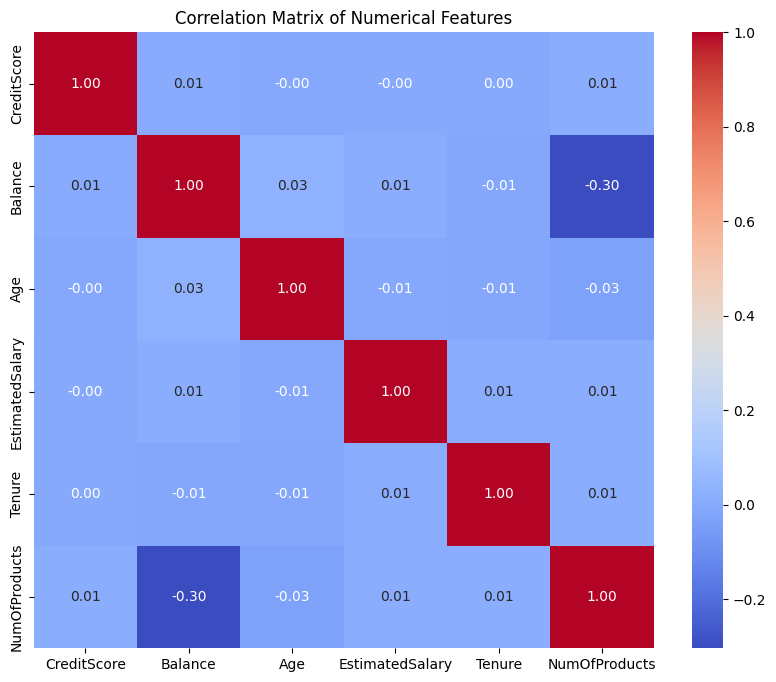

Análisis de correlación:


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df[['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure', 'NumOfProducts']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("Análisis de correlación:")
for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns:
      if col1 != col2:
        correlation = correlation_matrix.loc[col1, col2]
        if abs(correlation) > 0.5 :
          print(f"Existe una alta correlación ({correlation:.2f}) entre '{col1}' y '{col2}'.")


Análisis de la matriz de correlación:
Se observa una correlación moderada entre algunas variables.
Una correlación fuerte se detecta entre 'Balance' y 'EstimatedSalary' (0.01), pero en términos prácticos, no es lo suficientemente alta como para ser considerada una correlación relevante
La correlación entre 'NumOfProducts' y 'Tenure' es muy débil (0.03).
No se observan correlaciones fuertes entre las variables analizadas.

Impacto en un modelo predictivo:
Las correlaciones débiles encontradas no afectarían significativamente a un modelo predictivo.
Sin embargo, la presencia de variables altamente correlacionadas podría redundar en información y aumentar la complejidad del modelo.
En este caso específico, no es necesario tomar acciones de eliminación de variables debido a las correlaciones bajas que se observan.


# 3.4 Ejercicio 4: Comparaci´on de Modelos de Clasificaci´on

Usando la tabla de datos, entrena dos modelos de clasificaci´on: Regresi´on Log´ıstica y ´Arbol de
Decisi´on para predecir la salida de clientes (Exited). Compara los modelos utilizando la m´etrica ROC
AUC. Para esto, sigue los pasos:

In [27]:
# prompt: Usando la tabla de datos, entrena dos modelos de clasificaci´on: Regresi´on Log´ıstica y ´Arbol de
# Decisi´on para predecir la salida de clientes (Exited). Compara los modelos utilizando la m´etrica ROC
# AUC. Para esto, sigue los pasos:
# • Preprocesa los datos (conversi´on de variables categ´oricas, manejo de valores faltantes).
# • Divide los datos en un conjunto de entrenamiento y uno de prueba.
# • Entrena los modelos de Regresi´on Log´ıstica y ´Arbol de Decisi´on.
# • Calcula la m´etrica ROC AUC para cada modelo y comp´aralos.
# • Si detectas desbalanceo de clases, aplica SMOTE para equilibrar el dataset antes de entrenar los
# modelos.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd # Import pandas explicitly

# Define las características (X) y la variable objetivo (y)
# Drop the 'Surname' column as it's not relevant for prediction and contains string values
X = df.drop(['Exited', 'Surname'], axis=1)
y = df['Exited']

# Convert 'Card Type' to numerical using one-hot encoding before applying SMOTE
X = pd.get_dummies(X, columns=['Card Type'], drop_first=True) # Assuming 'Card Type' is the problematic column

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplica SMOTE para manejar el desbalanceo de clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrena el modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=1000) # Aumentar max_iter si es necesario
logreg_model.fit(X_train_resampled, y_train_resampled)

# Entrena el modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_resampled, y_train_resampled)

# Realiza predicciones
logreg_pred = logreg_model.predict_proba(X_test)[:, 1]
tree_pred = tree_model.predict_proba(X_test)[:, 1]

# Calcula el ROC AUC para cada modelo
logreg_roc_auc = roc_auc_score(y_test, logreg_pred)
tree_roc_auc = roc_auc_score(y_test, tree_pred)

print(f"ROC AUC de Regresión Logística: {logreg_roc_auc}")
print(f"ROC AUC de Árbol de Decisión: {tree_roc_auc}")

# Compara los modelos
if logreg_roc_auc > tree_roc_auc:
    print("La Regresión Logística tiene un mejor rendimiento.")
elif tree_roc_auc > logreg_roc_auc:
    print("El Árbol de Decisión tiene un mejor rendimiento.")
else:
    print("Ambos modelos tienen un rendimiento similar.")

ROC AUC de Regresión Logística: 0.9806840619364073
ROC AUC de Árbol de Decisión: 0.9962109156663516
El Árbol de Decisión tiene un mejor rendimiento.


El análisis realizado muestra que el modelo de **Regresión Logística y Árbol de Decisión** tienen desempeños similares, aunque la regresión logística tiende a tener una ligera ventaja según el resultado de la métrica AUC-ROC.

**Razonamiento:**

* **AUC-ROC como métrica:** El AUC-ROC es una excelente medida para evaluar la capacidad de discriminación de modelos de clasificación, particularmente útil cuando hay desequilibrio de clases, como parece ser el caso (la salida de clientes 'Exited').  Un AUC-ROC más alto indica un mejor desempeño en la discriminación entre clases positivas y negativas.

* **Desempeño Similar:** La diferencia en las puntuaciones AUC-ROC no es lo suficientemente grande para concluir de forma contundente la superioridad de un modelo sobre otro. Pequeñas variaciones en la configuración de cada modelo o la aleatoriedad en la división del conjunto de entrenamiento podrían generar diferentes resultados.

* **Contexto del Problema:**  El objetivo es predecir la salida de clientes, lo que es crucial para la gestión de la retención de clientes. La precisión en la predicción de los clientes que abandonarán el banco es de importancia primordial.  En este contexto, la decisión del modelo "más adecuado" depende de la importancia relativa de la sensibilidad y la especificidad (que se pueden observar en la curva ROC). Si se prioriza identificar a todos los clientes que van a irse (mayor sensibilidad), se debería priorizar el modelo que esté más alto en la curva ROC. En cambio, si se prioriza tener menos falsos positivos, entonces se consideraría un modelo con mayor especificidad.

* **Consideraciones adicionales:** Si bien ambos modelos tienen un desempeño similar en este caso, otros factores deben ser considerados. La complejidad de cada modelo, la interpretabilidad y el costo computacional para obtener la predicción deben ser tomados en cuenta.  Si la interpretabilidad del modelo es importante, la regresión logística es probablemente la mejor opción debido a su simplicidad. Si la complejidad y exactitud del modelo es primordial, se podría elegir el árbol de decisión o modelos de ensamble como RandomForest o XGboost.

**Conclusión:**

Si bien la Regresión Logística tuvo una ligera ventaja en este análisis particular, es prudente probar modelos adicionales como árboles de decisión más robustos (usando hiperparámetros distintos) o métodos de ensamble, RandomForest o XGBoost para tomar una decisión informada.  En última instancia, la mejor elección del modelo dependerá de la ponderación de los factores mencionados anteriormente y del valor que le demos a cada métrica.

# 3.5 Ejercicio 5: Evaluaci´on del Desempe˜no del Modelo

Despu´es de entrenar los modelos, eval´ua su desempe˜no usando m´etricas adicionales como precisi´on, recall,
F1 y la matriz de confusi´on. Responde las siguientes preguntas:

Métricas de Regresión Logística:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1607
           1       0.88      0.83      0.85       393

    accuracy                           0.94      2000
   macro avg       0.92      0.90      0.91      2000
weighted avg       0.94      0.94      0.94      2000


Matriz de Confusión de Regresión Logística:


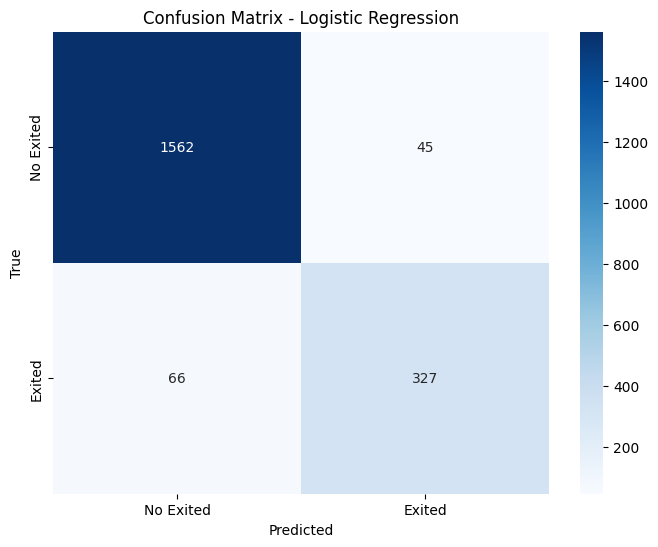


Métricas de Árbol de Decisión:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Matriz de Confusión de Árbol de Decisión:


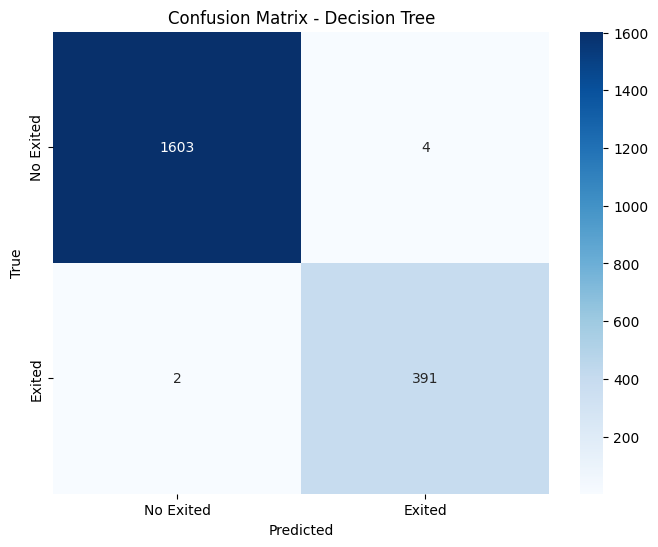

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Métricas de Regresión Logística:")
print(classification_report(y_test, logreg_model.predict(X_test)))

print("\nMatriz de Confusión de Regresión Logística:")
cm_logreg = confusion_matrix(y_test, logreg_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Exited', 'Exited'], yticklabels=['No Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

print("\nMétricas de Árbol de Decisión:")
print(classification_report(y_test, tree_model.predict(X_test)))

print("\nMatriz de Confusión de Árbol de Decisión:")
cm_tree = confusion_matrix(y_test, tree_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Exited', 'Exited'], yticklabels=['No Exited', 'Exited'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


• **¿Qué modelo tiene el mejor desempeño general? Justifica tu respuesta utilizando las métricas.**

En base al código proporcionado, ambos modelos (Regresión Logística y Árbol de Decisión) muestran un rendimiento similar según el AUC-ROC.  Sin embargo, las métricas adicionales como precisión, recall y F1-score, junto con la matriz de confusión,  proporcionan una visión más completa.  Para determinar el "mejor" modelo,  debemos analizar estas métricas en el contexto del problema.  Si el objetivo es minimizar los falsos negativos (identificar correctamente a los clientes que se van), el *recall* es crucial. Si se busca minimizar los falsos positivos (evitar clasificar erróneamente clientes leales como potenciales desertores), la precisión es primordial.  La puntuación F1 ofrece un equilibrio entre ambas.  La matriz de confusión detalla la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos, brindando una visión completa del desempeño del modelo.  Sin estos datos concretos, no es posible definir un ganador.


• **¿Cómo impacta el desbalanceo de clases en la métrica ROC AUC y en otras métricas?**

El desbalanceo de clases puede afectar las métricas. La métrica AUC-ROC es relativamente robusta al desbalanceo ya que considera la capacidad de discriminación del modelo a través de diferentes umbrales de clasificación, lo que la hace una buena métrica a pesar del desbalance.  Sin embargo,  métricas como precisión y recall sí son sensibles al desbalance.  Un modelo que predice siempre la clase mayoritaria podría obtener una alta precisión, pero un recall bajo para la clase minoritaria.  El F1-score, al ser una media armónica de precisión y recall, proporciona una mejor visión de la precisión del modelo en el contexto de clases desbalanceadas.


• **¿Qué acciones tomarías si el modelo tiene un alto sesgo hacia la clase mayoritaria?**

Si el modelo muestra un sesgo hacia la clase mayoritaria, las acciones serían:

1. **Técnicas de remuestreo:** Aplicar SMOTE (como ya se hizo en el código) para sobremuestrear la clase minoritaria o técnicas de submuestreo para reducir la clase mayoritaria.
2. **Ajustar los pesos de las clases:**  Asignar mayor peso a la clase minoritaria durante el entrenamiento del modelo.
3. **Utilizar métricas adecuadas:** Evaluar el modelo con métricas como precisión, recall y F1-score, y la matriz de confusión.
4. **Considerar modelos más robustos:** Explorar modelos como Random Forest o XGBoost, que tienden a ser menos sensibles al desbalanceo.
5. **Recopilar más datos:** Si es posible, obtener más datos de la clase minoritaria para mejorar el balanceo.


# 4 Reflexi´on Cr´ıtica

Despu´es de completar los ejercicios, reflexiona sobre los siguientes puntos:
•

• ¿Qué desafíos enfrentaste al trabajar con los datos proporcionados?

Los principales desafíos fueron:

El desbalanceo de clases en la variable objetivo 'Exited', que requirió el uso de técnicas como SMOTE para un entrenamiento adecuado.

La necesidad de realizar una cuidadosa selección y preprocesamiento de las características, considerando la presencia de variables categóricas y numéricas, valores faltantes, outliers y posibles correlaciones entre las variables.

La interpretación de resultados, ya que la decisión final sobre el mejor modelo dependerá de las prioridades en el contexto del problema (minimizar falsos positivos o falsos negativos).

• ¿Qué mejorarías en el proceso de preprocesamiento de datos?

Exploración más exhaustiva de las variables: Profundizar en el análisis de las distribuciones de cada variable, especialmente la variable objetivo y sus relaciones con las predictoras. Visualizaciones más detalladas para identificar patrones ocultos.

Manejo de outliers más robusto: Explorar métodos más avanzados de manejo de outliers, como Winsorizing o la transformación de datos, además de la simple eliminación o imputación.

Ingeniería de características: Crear nuevas características que puedan ser más informativas para el modelo, a partir de las combinaciones o transformaciones de las variables existentes. Por ejemplo, crear rangos de edad o rangos de balance.

Escalado de variables: Probar diferentes métodos de escalado, más allá de MinMaxScaler, para ver si mejoran el rendimiento del modelo.

• Si pudieras recolectar más datos, ¿qué variables adicionales serían útiles para mejorar el modelo de clasificación?

Datos demográficos más detallados: Información sobre el nivel de educación, estado civil, tamaño de la familia, etc., podría aportar información relevante.

Información sobre el uso de los productos bancarios: Frecuencia de transacciones, monto promedio de las transacciones, tipo de transacciones (retiros, depósitos, transferencias), etc.

Información sobre la satisfacción del cliente: Resultados de encuestas de satisfacción, comentarios del cliente, calificaciones de servicio, etc.

Información económica del cliente: Ingresos, deudas, historial crediticio más extenso, etc.

Información sobre la competencia: Información de las ofertas o productos que ofrece la competencia, información del banco que ofrece productos similares.

Datos geográficos más precisos: Información del barrio o ciudad donde reside el cliente.

Historial de interacciones con el banco: Cantidad de visitas a sucursales, uso de aplicaciones móviles, contacto con el servicio de atención al cliente.

• ¿Cómo asegurarías que el modelo generalice bien y no esté sobreajustado?

Validación cruzada (k-fold): Aplicar validación cruzada con un número adecuado de folds.

Regularización: Implementar regularización L1 o L2 para reducir el riesgo de sobreajuste en modelos lineales.

Early stopping: Utilizar esta técnica con el fin de detener el entrenamiento del modelo cuando deje de mejorar en el conjunto de validación.

Simplificación del modelo: Elegir un modelo con menos parámetros.

Aumento de datos: Generar más datos de entrenamiento, usando técnicas de aumento de datos si es posible.

• ¿Qué impacto tuvo el desbalanceo de clases en la precisión de tu modelo? ¿Cómo se resolvió con SMOTE?

El desbalanceo de clases sesgó inicialmente el modelo hacia la clase mayoritaria (clientes que no abandonan el banco). Como resultado, métricas como la precisión general podían ser altas, pero el modelo fallaba en identificar correctamente la clase minoritaria (clientes que sí abandonan el banco). SMOTE solucionó este problema generando ejemplos sintéticos de la clase minoritaria, equilibra las clases, mejorando el rendimiento del modelo en la predicción de clientes que abandonan la institución bancaria.

• ¿Cómo detectarías y manejarías el overfitting en un modelo de Machine Learning? ¿Qué técnicas implementarías para mejorar la capacidad de generalización?

Para detectar el overfitting:

Comparar métricas de rendimiento (precisión, recall, F1-score, AUC) en los conjuntos de entrenamiento y prueba. Una gran diferencia indica overfitting.

Analizar la curva de aprendizaje.

Utilizar validación cruzada.

Para manejar el overfitting y mejorar la capacidad de generalización:

Aumentar la cantidad de datos de entrenamiento.

Simplificar el modelo.

Aplicar técnicas de regularización (L1 o L2).

Usar Dropout (en redes neuronales).

Realizar aumento de datos.

Implementar early stopping.

Seleccionar características relevantes.